### IMPORTS

In [3]:
import BBVI
import torch
import matplotlib.pyplot as plt

### EXAMPLE

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [5]:
# load data
data = torch.load('foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

In [6]:
import importlib
importlib.reload(BBVI)

<module 'BBVI' from 'C:\\Users\\cortax\\Documents\\BayesianNN\\Toy dataset - Foong\\BBVI_GPU_V1\\BBVI.py'>

In [71]:
Net = BBVI.VariationalNetwork(input_size=1, output_size=1, layer_width=1000, nb_layers=2, device=device)

In [90]:
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.05}

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 10, 'factor': 0.8}

In [91]:
voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params)

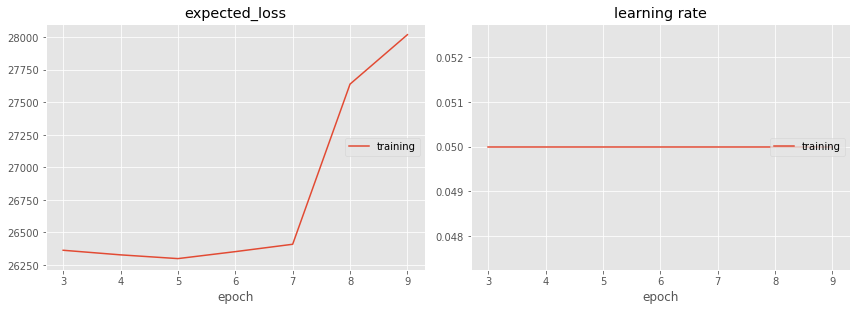

expected_loss:
training   (min: 26299.170, max: 695109.250, cur: 28018.914)

learning rate:
training   (min:    0.050, max:    0.050, cur:    0.050)


In [ ]:
Net = voptimizer.run((x_data,y_data), n_epoch=100, n_iter=100, n_ELBO_samples=500, plot=True)

In [87]:
x_test = torch.linspace(-2.0, 2.0).unsqueeze(1).to(device)

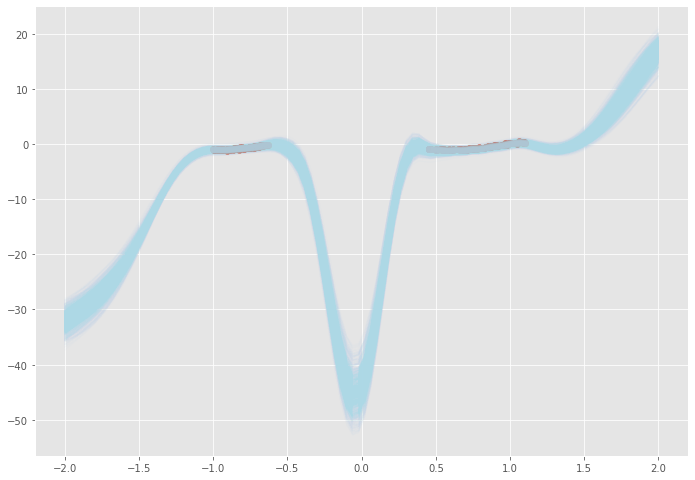

In [88]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.scatter(x_data.cpu(), y_data.cpu())
for _ in range(1000):
    Net.resample_parameters()

    y_test = Net.forward(x_test)
    plt.plot(x_test.detach().cpu().numpy(), y_test.squeeze(0).detach().cpu().numpy(), alpha=0.05, linewidth=1, color='lightblue')

### TRAINING LOOP FOR DIFFERENT NUMBERS OF SAMPLING

In [ ]:
data = torch.load('foong_data.pt')
optimizer_params = [0.1, 3, 0.5]               # [learning_rate, patience, factor]
sigma_noise = 0.1
gpu = '1'
n_seed = 0

In [ ]:
for i in [1,5,10,20]:
    name = '_SamplingELBO_'+str(i)
    BBVI_trained = BBVI.BBVI(data=data, n_neurons=50, n_epoch=5, n_iter=10, n_samples_ELBO=i, sigma_noise=sigma_noise, 
              opti_params=optimizer_params, n_seed=n_seed, gpu=gpu, name=name);
    BBVI.plot_BBVI_Uncertainty(BBVI_trained, data, name, gpu);